In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\Users\WXS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataframe = pd.read_csv('Hitters.csv', index_col=0).dropna()
data = pd.get_dummies(dataframe[['League', 'Division', 'NewLeague']])
t_data = dataframe.drop(['League', 'Division', 'NewLeague'], axis=1)
train_data = pd.concat([t_data, data[['League_A', 'Division_E', 'NewLeague_A']]],axis=1)
Y = train_data.Salary
X = train_data.drop(['Salary'], axis=1)

# Generate alphas

In [3]:
alphas = np.logspace(-3,7,100)

# 1.1 Lasso Regression

In [4]:
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False, normalize=True, max_iter=10000)
    lasso.fit(X,Y)
    coefs.append(lasso.coef_)
    

C:\Users\WXS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## plot

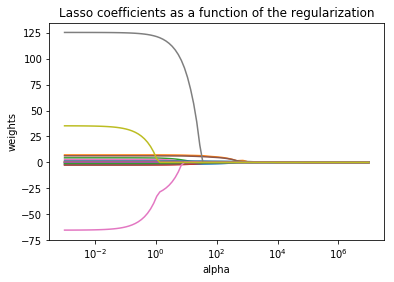

In [5]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## cross validation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=10000, normalize=True).fit(X_train, y_train)
lasso_cv.alpha_

0.21049041445120198

In [8]:
pd.Series(lasso_cv.coef_, index=X.columns)

AtBat          -1.716919
Hits            5.876075
HmRun           1.344589
Runs           -0.000000
RBI             0.135015
Walks           3.129581
Years          -5.415069
CAtBat         -0.000000
CHits           0.000000
CHmRun          0.893314
CRuns           0.792342
CRBI            0.021969
CWalks         -0.460136
PutOuts         0.304232
Assists         0.213990
Errors         -0.000000
League_A      -29.275615
Division_E     81.735117
NewLeague_A     0.000000
dtype: float64